In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scanpy as sc
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import scipy.stats
from scipy.sparse import csgraph
from sklearn.decomposition import PCA
import scipy
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn import metrics
import tabulate
import gget
from scipy.stats import gmean


# locals
import utils as ut


In [2]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scanpy/"

adata = {}

for f in os.listdir(dirPath):
    
    if f.endswith('.h5ad'):
        key = f.split(".")[0]
        fullPath = f"{dirPath}{f}"
        data = sc.read(fullPath)
        adata[key] = data
    
print("done")

done


In [3]:
cardOutDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDOuputs/"

dfList = []

for f in os.listdir(cardOutDir):
    if 'macrophage' in f:
        fullPath = f"{cardOutDir}{f}"
        key = f.split("_")[0]
        df = pd.read_csv(fullPath)
        df = df.rename(columns={'Unnamed: 0' : 'spotId'})
        df['key'] = key
        dfList.append(df)

df = pd.concat(dfList, ignore_index=True)
print(f"{df.shape=}")
print(df['key'].value_counts())
print()
cTypes = df.columns.to_list()
cTypes.remove("key")
cTypes.remove("spotId")
print(cTypes)
print()
df.head()

df.shape=(14836, 13)
HFD8     6782
ND       4068
HFD14    3986
Name: key, dtype: int64

['Dendritic cells', 'Mac4', 'Stromal cells', 'NK cells', 'Mac2', 'Monocytes', 'T cells', 'Mac5', 'Mac3', 'Mac1', 'B cells']



,spotId,Dendritic cells,Mac4,Stromal cells,NK cells,Mac2,Monocytes,T cells,Mac5,Mac3,Mac1,B cells,key
0,AAACAAGTATCTCCCA.1,0.087213,0.113186,0.270488,0.096431,0.057255,0.083130,0.047384,0.163491,0.049659,0.006606,0.025157,HFD8
1,AAACACCAATAACTGC.1,0.159247,0.129071,0.105884,0.002606,0.084753,0.088446,0.016601,0.302068,0.046115,0.038813,0.026395,HFD8
2,AAACAGCTTTCAGAAG.1,0.042437,0.128286,0.329050,0.064440,0.050805,0.049080,0.052493,0.100578,0.065773,0.025274,0.091783,HFD8
3,AAACAGGGTCTATATT.1,0.038153,0.094966,0.294255,0.055503,0.061959,0.060107,0.048176,0.127678,0.099188,0.040547,0.079468,HFD8
4,AAACAGTGTTCCTGGG.1,0.000020,0.256841,0.323585,0.003329,0.015668,0.010229,0.002518,0.222850,0.000587,0.000737,0.163636,HFD8


In [4]:
sptDir =  "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

spt = {}

for f in os.listdir(sptDir):
    if "spt" in f and "macrophage" in f:
        print(f)
        fullPath = f"{sptDir}{f}"
        key = f.split("_")[0]
        sdf = pd.read_csv(fullPath)
        sdf = sdf.rename(columns={'Unnamed: 0' : 'gene'})
        sdf = sdf.set_index('gene')
        sdf = sdf.T
        sdf.index = sdf.index.str.replace("-", ".")
        spt[key] = sdf
    
print('done')

HFD8_macrophage_spt.csv
HFD14_macrophage_spt.csv
ND_macrophage_spt.csv
done


In [5]:
fPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/LR/LewisLabUSCS/Mouse/Mouse-2020-Baccin-LR-pairs.xlsx"

lr = pd.read_excel(fPath)
print(lr.shape)

lr['ligand'] = lr['Ligand.Mouse'].str.upper()
lr['receptor'] = lr['Receptor.Mouse'].str.upper()
lr.head()

(2000, 8)


,Pair.Name,Ligand.Mouse,Receptor.Mouse,Source,ManualAnnotation,Ligand.CC,Ligand.GO,Reference (PMID / KEGG),ligand,receptor
0,A2m-Lrp1,A2m,Lrp1,Ramilowski,Correct,Secreted,Other,"1702392,10652313, 12194978",A2M,LRP1
1,Adgre5-Cd55,Adgre5,Cd55,Baccin,Correct,Membrane,Other,23447688,ADGRE5,CD55
2,Adipoq-Adipor1,Adipoq,Adipor1,Ramilowski,Correct,Secreted,Other,12802337,ADIPOQ,ADIPOR1
3,Adipoq-Adipor2,Adipoq,Adipor2,Ramilowski,Correct,Secreted,Other,"12802337, 12802330",ADIPOQ,ADIPOR2
4,Adm-Calcrl&Ramp2,Adm,Calcrl&Ramp2,Baccin,Correct,Secreted,Other,10342881,ADM,CALCRL&RAMP2


In [6]:
coordDir = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"

dfList = []

for f in os.listdir(coordDir):
    if "coord" in f:
        fullPath = f"{coordDir}{f}"
        key = f.split("_")[0]
        cdf = pd.read_csv(fullPath)
        cdf = cdf.rename(columns={'Unnamed: 0' : 'spotId'})
        cdf['key'] = key
        dfList.append(cdf)

cdf = pd.concat(dfList, ignore_index=True)
print(f"{cdf.shape=}")
print(cdf['key'].value_counts())
print()
cdf.head()

cdf.shape=(14848, 4)
HFD8     6788
ND       4072
HFD14    3988
Name: key, dtype: int64



,spotId,x,y,key
0,AAACATTTCCCGGATT.1,1139.783401,1365.804581,HFD14
1,AAACCGGGTAGGTACC.1,468.056902,1045.415505,HFD14
2,AAACCGTTCGTCCAGG.1,604.524374,1214.452428,HFD14
3,AAACCTAAGCAGCCGG.1,1003.708924,1433.743571,HFD14
4,AAACCTCATGAAGTTG.1,380.369919,960.970730,HFD14


In [7]:
"""Merge CARD predictions with spatial coordinates"""
df = pd.merge(cdf, df,
              how='left', 
              left_on=['spotId', 'key'],
              right_on=['spotId', 'key'])

df = df.fillna(0)
df = df.drop_duplicates() # very important!
print(df['key'].value_counts())
df.head()

HFD8     3394
ND       2036
HFD14    1994
Name: key, dtype: int64


,spotId,x,y,key,Dendritic cells,Mac4,Stromal cells,NK cells,Mac2,Monocytes,T cells,Mac5,Mac3,Mac1,B cells
0,AAACATTTCCCGGATT.1,1139.783401,1365.804581,HFD14,3.468007e-02,0.007548,0.409201,0.170860,0.004757,0.041542,0.055275,0.219997,0.010912,0.004188,0.041040
2,AAACCGGGTAGGTACC.1,468.056902,1045.415505,HFD14,1.280364e-03,0.088368,0.187514,0.019633,0.028867,0.129969,0.040070,0.450618,0.008903,0.013757,0.031021
4,AAACCGTTCGTCCAGG.1,604.524374,1214.452428,HFD14,3.752028e-04,0.004256,0.283055,0.187004,0.021560,0.108340,0.044845,0.310869,0.003200,0.004016,0.032480
6,AAACCTAAGCAGCCGG.1,1003.708924,1433.743571,HFD14,1.198581e-07,0.009084,0.239973,0.043516,0.004948,0.057287,0.052469,0.558332,0.000064,0.023214,0.011113
8,AAACCTCATGAAGTTG.1,380.369919,960.970730,HFD14,1.377525e-02,0.029749,0.216199,0.122802,0.053188,0.158933,0.041466,0.234411,0.043126,0.037127,0.049224


In [8]:
keys = ['ND', 'HFD8', 'HFD14']

lrData = {}

for key in keys:
    sdf = spt[key]
    newCols = {}
    
    for idx, row in lr.iterrows():
        l = row['ligand']
        r = row['receptor']
        
        if l in sdf.columns and r in sdf.columns:
            gMean = scipy.stats.gmean(sdf[[l, r]], axis=1)
            lrName = row['Pair.Name']
            newCols[lrName] = gMean
    
    lrdf = pd.DataFrame(newCols)
    lrdf.index = sdf.index
    
    # remove zero-sum columns 
    lrdf = lrdf.loc[:, (lrdf.sum(axis=0) != 0)]
    print(sdf.shape, lrdf.shape)
    
    lrData[key] = lrdf


print('done')

(2036, 31053) (2036, 124)
(3394, 31053) (3394, 253)
(1994, 31053) (1994, 270)
done


In [9]:
irePath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/annotations/IRE1_substrates.txt"
ire = [x.upper().strip() for x in open(irePath)]
print(f"{len(ire)=}")
ire[:10]

len(ire)=809


['NARF',
 'FER',
 'XPO6',
 'ACVR1B',
 'B9D1',
 'PCNT',
 'LSR',
 'PFDN5',
 'ITGA3',
 'NUP214']

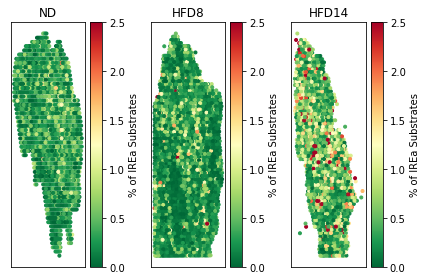

In [10]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 15, 4
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3)
axs = axs.ravel()
cmap = 'RdYlGn_r'

for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    
    X = sdf[ire].astype(bool)
    rowSums = (X.sum(axis=1) / len(X)) * 100
    
    p = axs[i].scatter(kdf['x'], 
                       kdf['y'], 
                       c=rowSums, 
                       marker=".", 
                       vmin=0, 
                       vmax=2.5, 
                       cmap=cmap)

    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
    axs[i].invert_yaxis()
    axs[i].set_title(key)
    plt.colorbar(p, ax=axs[i], label="% of IREa Substrates")    
    
plt.tight_layout() 


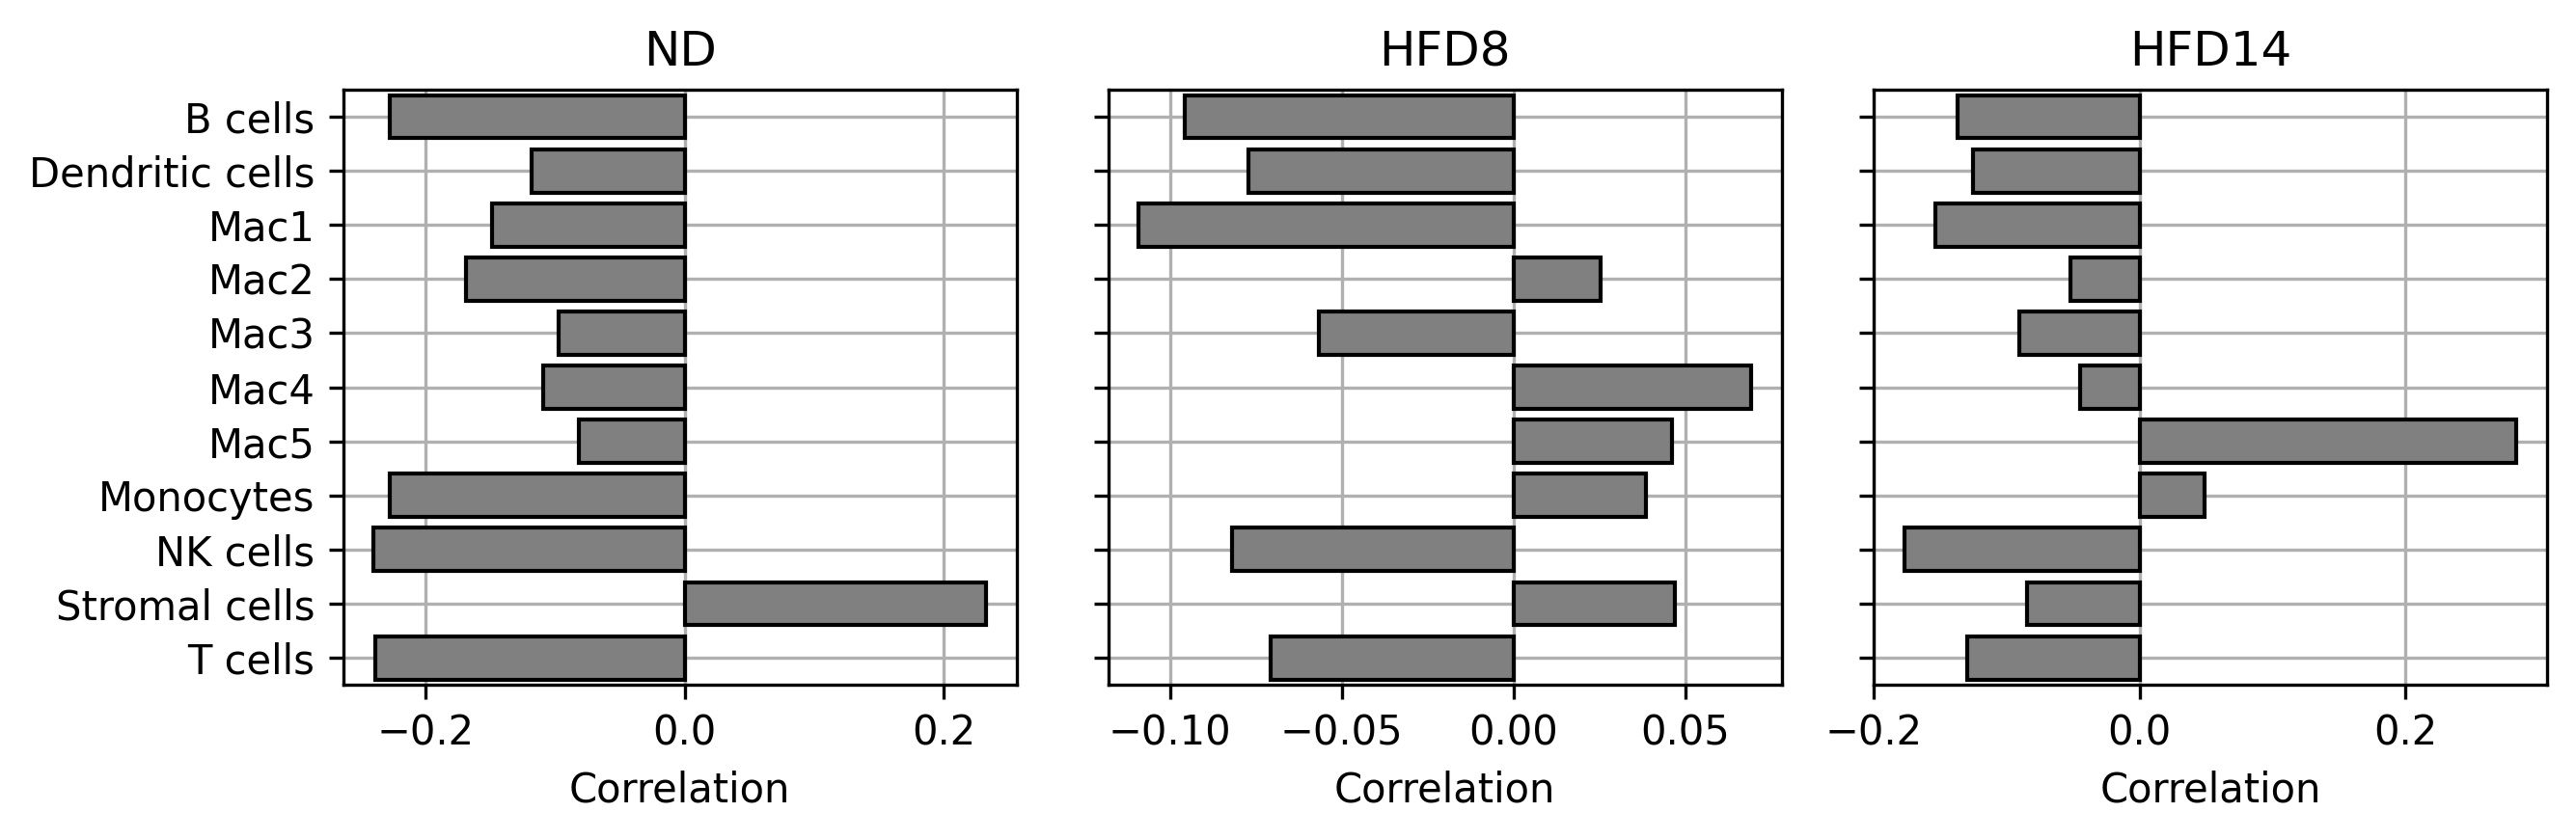

In [11]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 9, 3
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3, sharey=True)
axs = axs.ravel()
cmap = 'RdYlGn_r'


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    
    X = sdf[ire].astype(bool)
    exp = (X.sum(axis=1) / len(X))
    res = []
    
    for cType in cTypes:
        r = scipy.stats.pearsonr(exp, kdf[cType])
        row = {
            'key' : key, 
            'cType' : cType, 
            'r' : r[0],
            'pval' : r[1],
        }
        res.append(row)
        
    res = pd.DataFrame(res)
    res = res.sort_values(by='cType')
    
    sns.barplot(data=res, 
                x='r', 
                y='cType',
                color='grey',
                edgecolor='k',
                zorder=2,
                ax=axs[i])
    
    axs[i].set_xlabel("Correlation")
    axs[i].set_ylabel("")
    axs[i].set_title(key)
    axs[i].grid(zorder=1)

plt.tight_layout()

In [12]:
t = 5 # numbers of ER stress genes expressed 

keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['figure.facecolor'] = "w"


colors = ['#9e0142', 
          '#e95c47', 
          '#fdbf6f', 
          '#fdbf6f', 
          '#fdbf6f', 
          '#fdbf6f',  
          '#fdbf6f', # mac5
          '#ffffbe',
          '#bfe5a0', 
          '#54aead',
          '#5e4fa2',
        ]

deg = []

for i, key in enumerate(keys):
    print(f"running {key}....")
    kdf = df[df['key'] == key]
    sdf = spt[key]
    genes = sdf.columns.to_list()
    
    X = sdf[ire].astype(bool)
    rowSums = X.sum(axis=1)
    
    mask = rowSums > t
    
    inGroup = sdf[mask]
    outGroup = sdf[~mask]
    
    spotIds = sdf[mask].index
    spots = kdf[kdf['spotId'].isin(spotIds)]
    
    print(spots[sorted(cTypes)].mean(axis=0), '\n')
    
    for i, g in enumerate(genes):
        
        scores, pvals = stats.ttest_ind_from_stats(
            mean1=inGroup[g].mean(),
            std1=inGroup[g].std(),
            nobs1=inGroup.shape[0],
            mean2=outGroup[g].mean(),
            std2=outGroup[g].std(),
            nobs2=outGroup.shape[0],
            equal_var=False,  # Welch's
        )
        
        lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
        p = inGroup[g].astype(bool).sum() / mask.sum()
        
        isERMarker = False
        if g in ire:
            isERMarker = True
               
        row = {
            'key' : key,
            'gene' : g,
            'pval' : pvals,
            'logfoldchange' : lfc,
            'meanGroup' : inGroup[g].mean(),
            'meanOther' : outGroup[g].mean(),
            'isERMarker' : isERMarker,
            'percExp' : p,
        }
        
        deg.append(row)
    
deg = pd.DataFrame(deg)
print(f"{deg.shape=}")
deg.head()

running ND....
B cells            0.007689
Dendritic cells    0.004239
Mac1               0.018887
Mac2               0.015674
Mac3               0.004098
Mac4               0.031224
Mac5               0.040098
Monocytes          0.019520
NK cells           0.015815
Stromal cells      0.831468
T cells            0.011289
dtype: float64 



/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


running HFD8....
B cells            0.057731
Dendritic cells    0.013940
Mac1               0.029804
Mac2               0.042006
Mac3               0.022455
Mac4               0.115456
Mac5               0.128520
Monocytes          0.039777
NK cells           0.027777
Stromal cells      0.501005
T cells            0.021529
dtype: float64 



/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


running HFD14....
B cells            0.041227
Dendritic cells    0.022671
Mac1               0.033888
Mac2               0.027161
Mac3               0.024937
Mac4               0.027106
Mac5               0.335335
Monocytes          0.086357
NK cells           0.083710
Stromal cells      0.278794
T cells            0.038813
dtype: float64 



/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/1563029779.py:56: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


deg.shape=(93159, 8)


,key,gene,pval,logfoldchange,meanGroup,meanOther,isERMarker,percExp
0,ND,XKR4,0.157406,inf,0.002049,0.00000,False,0.002049
1,ND,GM1992,NaN,NaN,0.000000,0.00000,False,0.000000
2,ND,GM37381,NaN,NaN,0.000000,0.00000,False,0.000000
3,ND,RP1,NaN,NaN,0.000000,0.00000,False,0.000000
4,ND,SOX17,0.076618,0.929859,0.014344,0.00566,False,0.012295


In [13]:
def printGSR(ef, top=None, columns=['path_name', 'overlapping_genes']):
    """A function to print pathway results """
    n = top
    if top is None:
        n = len(ef)

    ef['overlapping_genes'] = ef['overlapping_genes'].apply(lambda x: ", ".join(x))
    printDf = ef[columns].head(n)
    print(tabulate.tabulate(printDf, 
                            headers=columns, 
                            showindex=False,
                            tablefmt='orgtbl'))

In [14]:
n = 5
show = 30
alpha = 0.05
nGene = 100

# db = 'WikiPathways_2019_Mouse'
# db = 'KEGG_2019_Mouse'
db = 'ontology'

for i, key in enumerate(keys):
    
    cdf = deg[deg['key'] == key]
    cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
    cdf = cdf[cdf['pval'] <= alpha]
    print(f"{key} {cdf.shape=}")
    
    cdf['score'] = cdf['logfoldchange'] * cdf['percExp']
    cdf = cdf.sort_values(by='score', ascending=False) 
    print(f"==== {key} ====")
    print(cdf[['gene', 'logfoldchange', 'meanGroup', 'meanOther', 'percExp', 'isERMarker']].head(show), '\n')
    
    query  = deg['gene'].head(nGene).to_list()
    
    pd.set_option('display.max_colwidth', 200)
    ef = gget.enrichr(query, database=db)
    ef = ef[ef['p_val'] <= alpha].reset_index(drop=True)
    printGSR(ef, show)
    print()
    
    
    
    # break
    

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:47:07 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


ND cdf.shape=(2890, 8)
==== ND ====
           gene  logfoldchange  meanGroup  meanOther   percExp  isERMarker
5223      FABP4       1.293214  15.544057   4.265094  0.991803       False
5241       CAR3       1.119008   7.619877   2.488679  0.970287       False
15279       CFD       1.029593  14.316598   5.113208  0.994877       False
9975       ACTB       1.145989   3.032787   0.964151  0.788934       False
3775      YWHAB       1.505302   0.973361   0.216038  0.553279        True
30792      SCD1       0.801143   6.078893   2.728302  0.943648       False
19934      RPL4       1.136948   1.382172   0.443396  0.646516       False
16672       LPL       1.154084   1.343238   0.423585  0.635246       False
2208        GSN       1.035220   1.577869   0.560377  0.673156       False
8458       CD36       1.164204   1.257172   0.392453  0.568648       False
10222      CAV1       1.218693   0.890369   0.263208  0.519467       False
6022      TXNIP       1.645312   0.557377   0.107547  0.371926  

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:47:08 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


| path_name                                                                                           | overlapping_genes    |
|-----------------------------------------------------------------------------------------------------+----------------------|
| nuclear cell cycle DNA replication initiation (GO:1902315)                                          | MCMDC2, MCM3         |
| mitotic DNA replication initiation (GO:1902975)                                                     | MCMDC2, MCM3         |
| pre-replicative complex assembly involved in nuclear cell cycle DNA replication (GO:0006267)        | MCMDC2, MCM3         |
| interleukin-17-mediated signaling pathway (GO:0097400)                                              | IL17F, IL17A         |
| cellular response to interleukin-17 (GO:0097398)                                                    | IL17F, IL17A         |
| mitotic DNA replication (GO:1902969)                                                                | MCMDC2,

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:47:08 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


| path_name                                                                                           | overlapping_genes    |
|-----------------------------------------------------------------------------------------------------+----------------------|
| nuclear cell cycle DNA replication initiation (GO:1902315)                                          | MCMDC2, MCM3         |
| mitotic DNA replication initiation (GO:1902975)                                                     | MCMDC2, MCM3         |
| pre-replicative complex assembly involved in nuclear cell cycle DNA replication (GO:0006267)        | MCMDC2, MCM3         |
| interleukin-17-mediated signaling pathway (GO:0097400)                                              | IL17F, IL17A         |
| cellular response to interleukin-17 (GO:0097398)                                                    | IL17F, IL17A         |
| mitotic DNA replication (GO:1902969)                                                                | MCMDC2,

In [15]:
# break

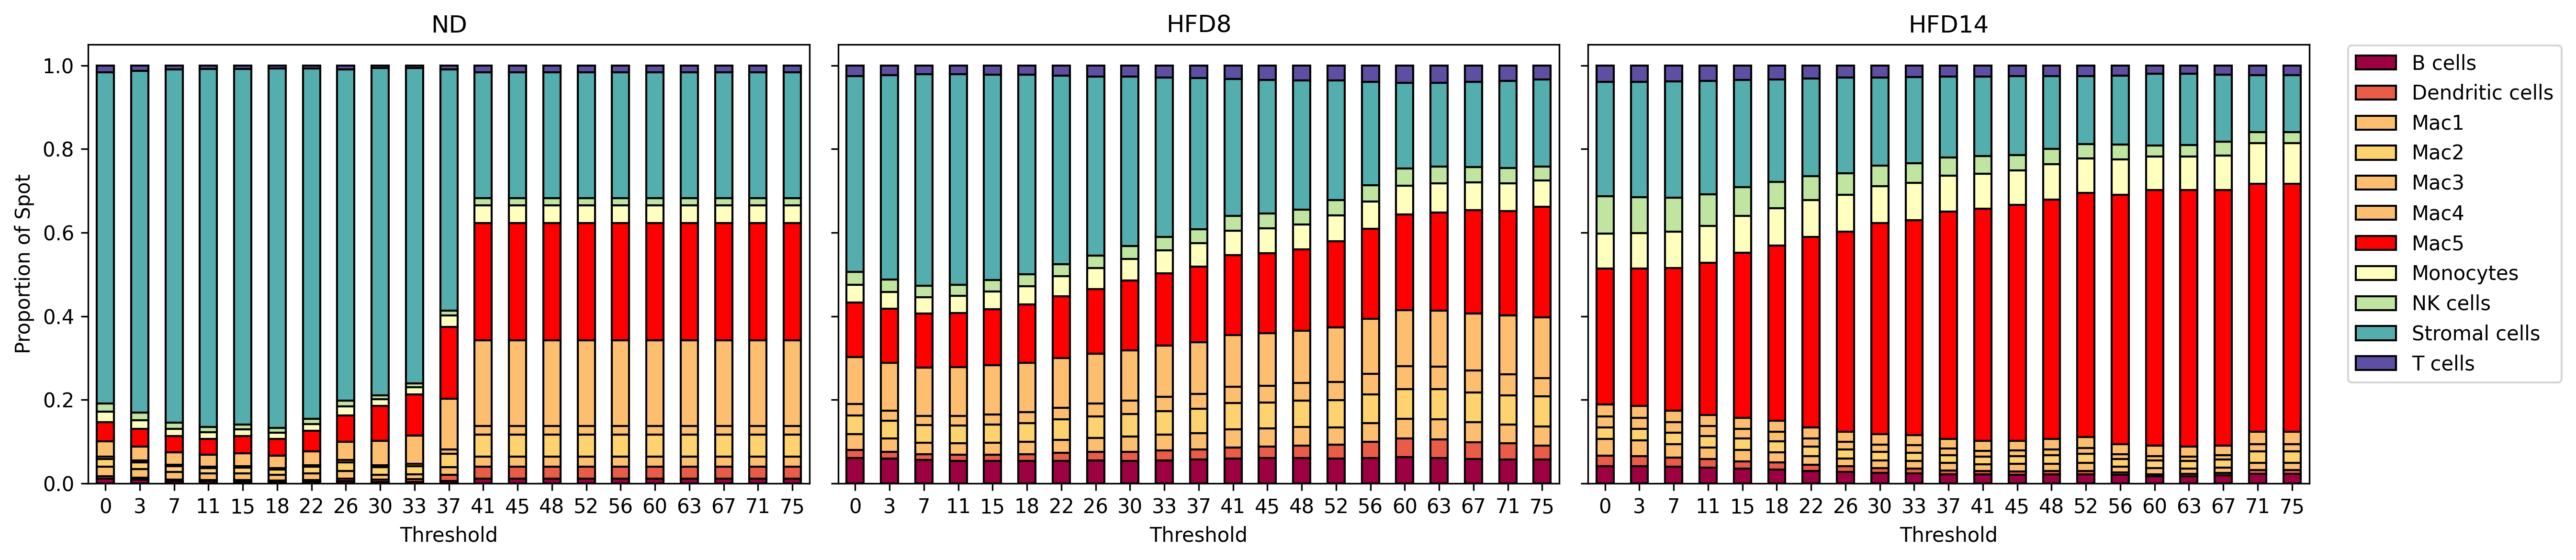

In [16]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 18, 4
plt.rcParams['figure.facecolor'] = "w"


fig, axs = plt.subplots(1, 3, sharey=True)
axs = axs.ravel()
cmap = 'RdYlGn_r'
tRange = np.linspace(0, 75, 21).astype(int)


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    lrdf = lrData[key]
    
    rowSum = sdf[ire].astype(bool).sum(axis=1) 
    
    res = []
    
    for t in tRange:
        mask = (rowSum > t)
        spotIds = sdf[mask].index
        spots = kdf[kdf['spotId'].isin(spotIds)]

        props = pd.DataFrame(spots[cTypes].mean(axis=0))
        props['t'] = t
        res.append(props)

        
    res = pd.concat(res)
    res = res.reset_index(drop=False)
    res.columns = ['cellType', 'proportion', 'threshold']
    
    res2 = pd.pivot_table(res, 
                          values='proportion', 
                          index=['cellType'], 
                          columns='threshold').reset_index()
    
    color = ['#9e0142', 
             '#e95c47', 
             '#fdbf6f', 
             '#fdd26f',
             '#fdbf6f',
             '#fdbf6f', 
             'r', # mac5
             '#ffffbe',
             '#bfe5a0', 
             '#54aead',
             '#5e4fa2',
        ]

    res2 = res2.set_index('cellType')
    res2.T.plot(kind='bar', 
                stacked=True, 
                edgecolor='k', 
                ax=axs[i], 
                legend=False,
                color=color)
    
    
    handles = []
    
    for ic, ctype in enumerate(sorted(cTypes)):
        
        handle = mpatches.Patch(color=color[ic], 
                                ec='k', 
                                label=ctype)
        handles.append(handle)
        
    axs[i].set_ylabel('Proportion of Spot')
    axs[i].tick_params(labelrotation=0)
    axs[i].set_xlabel("Threshold")
    axs[i].set_title(key)
    

plt.legend(handles=handles, bbox_to_anchor=(1.04, 1.02))
plt.tight_layout()    

==== ND ====
                 LR  Proportion
98          C3-Cd81    0.309524
15        Cdh5-Cdh5    0.190476
116      Gnas-Adrb3    0.166667
52        Mcam-Mcam    0.142857
19      Col1a1-Cd36    0.119048
20      Col1a2-Cd36    0.095238
100         C3-Lrp1    0.095238
50         Lpl-Lrp1    0.095238
1    Adipoq-Adipor2    0.071429
62      Ptprm-Ptprm    0.071429
88         Cav1-App    0.071429
81         App-Cav1    0.071429
80      Aplp2-H2-D1    0.047619
60        Psap-Lrp1    0.047619
59    Pecam1-Pecam1    0.047619

['C3', 'Cd81', 'Cdh5', 'Cdh5', 'Gnas', 'Adrb3', 'Mcam', 'Mcam', 'Col1a1', 'Cd36', 'Col1a2', 'Cd36', 'C3', 'Lrp1', 'Lpl', 'Lrp1', 'Adipoq', 'Adipor2', 'Ptprm', 'Ptprm', 'Cav1', 'App', 'App', 'Cav1', 'Aplp2', 'H2', 'D1', 'Psap', 'Lrp1', 'Pecam1', 'Pecam1']
==== HFD8 ====
              LR  Proportion
35   Col1a1-Cd36    0.384279
202      C3-Cd81    0.323144
40   Col1a2-Cd36    0.216157
89      Lpl-Lrp1    0.157205
170     Cav1-App    0.141921
159     App-Cav1    0.141921
1

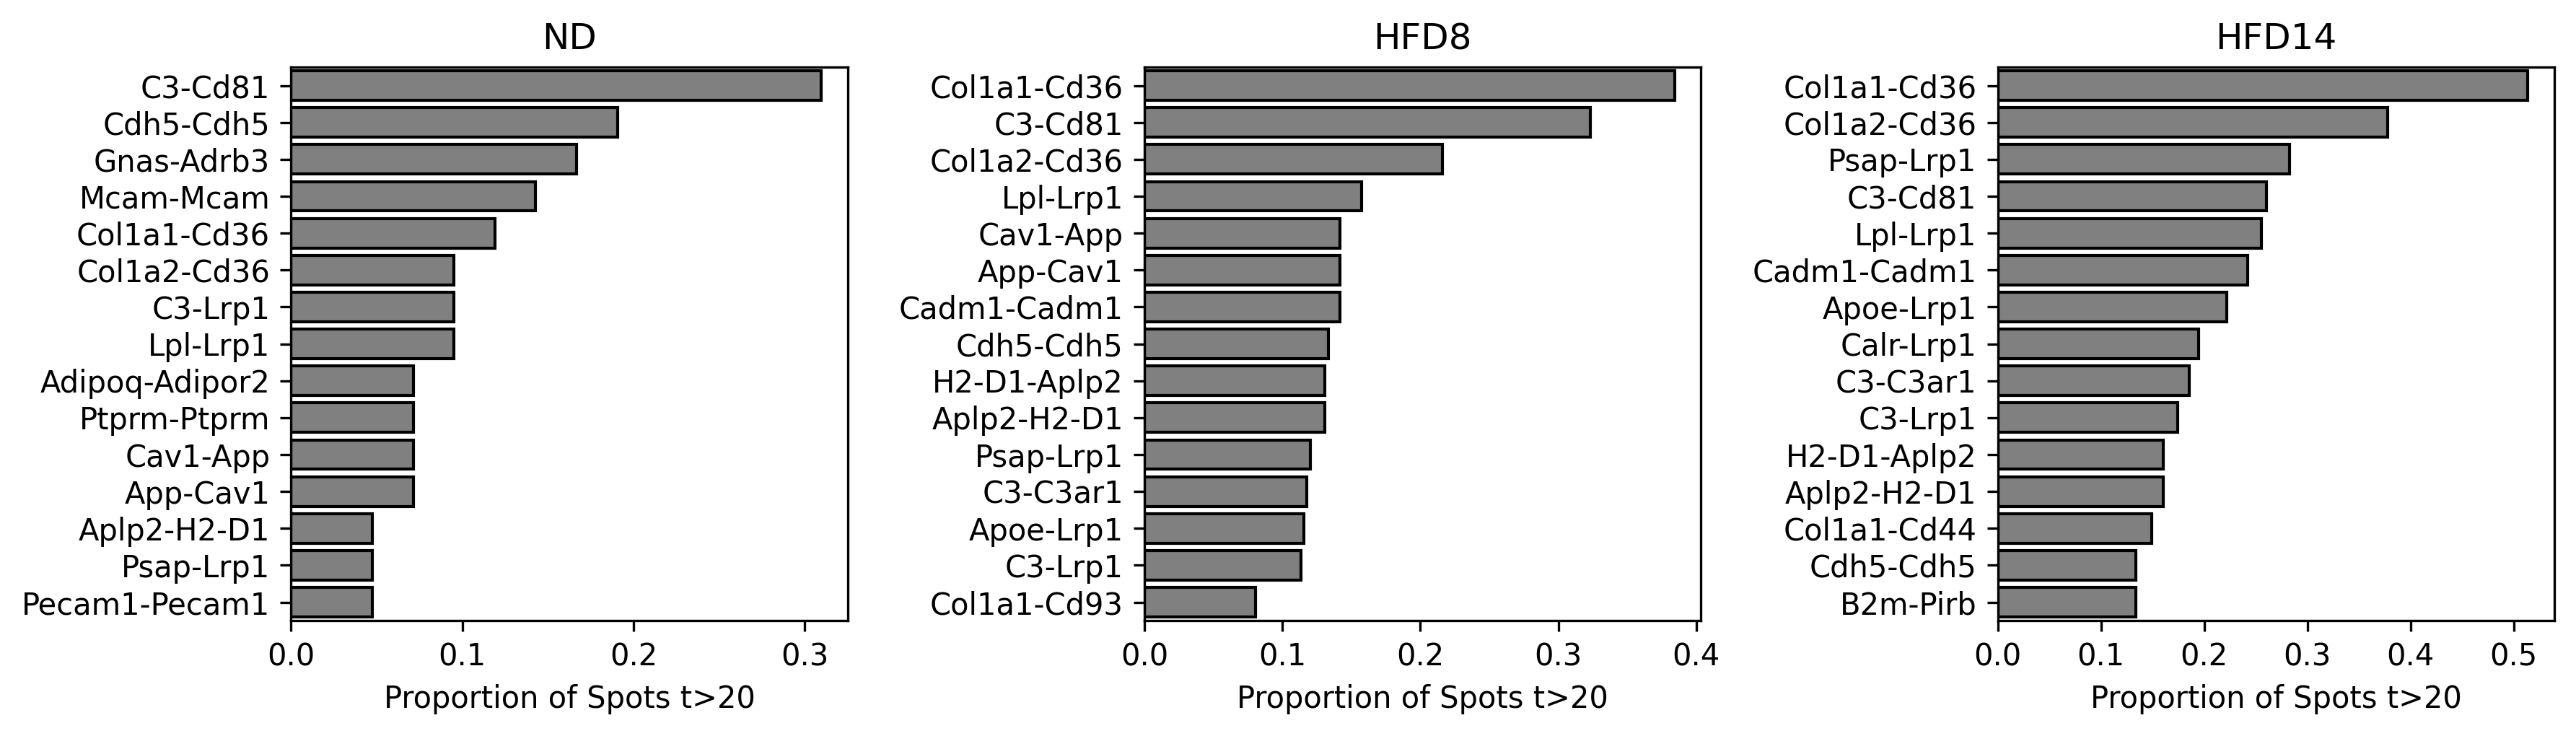

In [17]:
keys = ['ND', 'HFD8', 'HFD14']

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 12, 3.5
plt.rcParams['figure.facecolor'] = "w"

def flatten(l):
    return [item for sublist in l for item in sublist]


fig, axs = plt.subplots(1, 3, sharey=False)
axs = axs.ravel()

t = 20
n = 15


for i, key in enumerate(keys):
    kdf = df[df['key'] == key]
    sdf = spt[key]
    lrdf = lrData[key]
    
    rowSum = sdf[ire].astype(bool).sum(axis=1) 
    mask = (rowSum > t)
    
    spotIds = sdf[mask].index
    ldfBool = lrdf[lrdf.index.isin(spotIds)].astype(bool)
    
    colSumns = ldfBool.sum(axis=0)
    prop = colSumns / len(ldfBool)
    prop = pd.DataFrame(prop)
    prop = prop.reset_index(drop=False)
    prop.columns = ['LR', 'Proportion']
    prop = prop.sort_values(by='Proportion', ascending=False)
    print(f"==== {key} ====")
    print(prop.head(n))
    
    print()
    lrList = [x.split("-") for x in prop['LR'].head(n)]
    print(flatten(lrList))
    
    sns.barplot(data=prop.head(n),
                y='LR', 
                x='Proportion', 
                color='grey',
                edgecolor='k',
                ax=axs[i])
        
    axs[i].set_ylabel("")
    axs[i].set_xlabel(f"Proportion of Spots t>{t}")
    axs[i].set_title(key)

plt.tight_layout()

In [18]:
cardDir =  "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/CARDInputs/"
keys = ['ND', 'HFD8', 'HFD14']

rna = {}
labels = {}

for key in keys:
    labelPath = f"{cardDir}{key}_macrophage_clusters.csv"
    lf = pd.read_csv(labelPath)
    labels[key] = lf
    
    rnaPath = f"{cardDir}{key}_macrophage_rna.csv"
    rf = pd.read_csv(rnaPath)
    rf = rf.T
    new_header = rf.iloc[0] 
    rf = rf[1:] 
    rf.columns = new_header 
    rf.index.names = ['cellId']
    
    rna[key] = rf

print('done')

done


In [19]:
t = 100

deg = []

for key in keys:
    rf = rna[key]
    lf = labels[key]
    
    genes = list(rf.columns)
    
    rowSums = rf[ire].astype(bool).sum(axis=1) 
    mask = rowSums > t
    cellIds = rf[mask].index
    
    erCells = lf[lf['cellId'].isin(cellIds)]
    nCell = len(erCells)
    print(f"==== {key} {nCell=}====")
    print(erCells['cellType'].value_counts(normalize=True))
    print()
    
    inGroup = rf[mask]
    outGroup = rf[~mask]

    for i, g in enumerate(genes):
        scores, pvals = stats.ttest_ind_from_stats(
            mean1=inGroup[g].mean(),
            std1=inGroup[g].std(),
            nobs1=inGroup.shape[0],
            mean2=outGroup[g].mean(),
            std2=outGroup[g].std(),
            nobs2=outGroup.shape[0],
            equal_var=False,  # Welch's
        )
        
        lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
        p = inGroup[g].astype(bool).sum() / mask.sum()
        
        isERMarker = False
        if g in ire:
            isERMarker = True
               
        row = {
            'key' : key,
            'gene' : g,
            'pval' : pvals,
            'logfoldchange' : lfc,
            'meanGroup' : inGroup[g].mean(),
            'meanOther' : outGroup[g].mean(),
            'isERMarker' : isERMarker,
            'percExp' : p,
        }
        
        deg.append(row)
        
    
deg = pd.DataFrame(deg)
print(f"{deg.shape=}")
deg.head()

==== ND nCell=896====
B cells            0.235491
Mac3               0.194196
Dendritic cells    0.128348
Mac1               0.120536
Monocytes          0.099330
T cells            0.090402
NK cells           0.060268
Stromal cells      0.033482
Mac2               0.018973
Mac4               0.014509
Mac5               0.004464
Name: cellType, dtype: float64



/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


==== HFD8 nCell=3865====
Dendritic cells    0.245796
T cells            0.157309
Mac4               0.136352
Mac3               0.120828
Mac5               0.085640
Monocytes          0.075809
Mac1               0.054075
NK cells           0.045796
Mac2               0.041915
B cells            0.026908
Stromal cells      0.009573
Name: cellType, dtype: float64



/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


==== HFD14 nCell=3478====
Mac5               0.506613
Mac4               0.209028
Dendritic cells    0.097757
Mac1               0.088844
Monocytes          0.043703
Mac3               0.015526
Stromal cells      0.012363
NK cells           0.010063
B cells            0.007763
Mac2               0.006038
T cells            0.002300
Name: cellType, dtype: float64



/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: divide by zero encountered in log
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/2967784090.py:36: RuntimeWarning: invalid value encountered in double_scalars
  lfc =  np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())


deg.shape=(93159, 8)


,key,gene,pval,logfoldchange,meanGroup,meanOther,isERMarker,percExp
0,ND,XKR4,NaN,NaN,0.000000,0.0,False,0.00000
1,ND,GM1992,NaN,NaN,0.000000,0.0,False,0.00000
2,ND,GM37381,NaN,NaN,0.000000,0.0,False,0.00000
3,ND,RP1,NaN,NaN,0.000000,0.0,False,0.00000
4,ND,SOX17,0.058741,inf,0.011161,0.0,False,0.00558


In [20]:
n = 5
show = 30
alpha = 0.05
nGene = 100

# db = 'WikiPathways_2019_Mouse'
# db = 'KEGG_2019_Mouse'
db = 'ontology'

for i, key in enumerate(keys):
    
    cdf = deg[deg['key'] == key]
    cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
    cdf = cdf[cdf['pval'] <= alpha]
    print(f"{key} {cdf.shape=}")
    
    cdf['score'] = cdf['logfoldchange'] * cdf['percExp']
    cdf = cdf.sort_values(by='score', ascending=False) 
    print(f"==== {key} ====")
    print(cdf[['gene', 'logfoldchange', 'meanGroup', 'meanOther', 'percExp', 'isERMarker']].head(show), '\n')
    
    query  = deg['gene'].head(nGene).to_list()
    
    pd.set_option('display.max_colwidth', 200)
    ef = gget.enrichr(query, database=db)
    ef = ef[ef['p_val'] <= alpha].reset_index(drop=True)
    printGSR(ef, show)
    print()
    
    
    
    # break
    

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:56:44 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


ND cdf.shape=(11229, 8)
==== ND ====
         gene  logfoldchange    meanGroup  meanOther   percExp  isERMarker
10968    IGKC       2.691834  1053.732143  71.397260  0.952009       False
4610    RPL10       2.501082    26.362723   2.161644  0.969866       False
3485     CST3       2.630453    62.251116   4.484932  0.919643       False
25278    IGHM       2.458920   459.998884  39.342466  0.941964       False
4595     SSR4       2.967533     5.540179   0.284932  0.763393       False
1833      VIM       2.617361    13.474330   0.983562  0.856027       False
27853    RPS2       2.279407    25.886161   2.649315  0.982143       False
11976   RPL28       2.252792    28.151786   2.958904  0.988839       False
12959   RPS11       2.225300    35.604911   3.846575  0.998884       False
430    EEF1B2       2.328280    11.131696   1.084932  0.947545       False
28127   RPS18       2.221384    21.774554   2.361644  0.988839       False
17715   RPL15       2.245736    15.555804   1.646575  0.977679 

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:56:45 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


| path_name                                                                                           | overlapping_genes    |
|-----------------------------------------------------------------------------------------------------+----------------------|
| nuclear cell cycle DNA replication initiation (GO:1902315)                                          | MCMDC2, MCM3         |
| mitotic DNA replication initiation (GO:1902975)                                                     | MCMDC2, MCM3         |
| pre-replicative complex assembly involved in nuclear cell cycle DNA replication (GO:0006267)        | MCMDC2, MCM3         |
| interleukin-17-mediated signaling pathway (GO:0097400)                                              | IL17F, IL17A         |
| cellular response to interleukin-17 (GO:0097398)                                                    | IL17F, IL17A         |
| mitotic DNA replication (GO:1902969)                                                                | MCMDC2,

/tmp/ipykernel_180670/2842776382.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  cdf = cdf[~cdf.isin([np.nan, np.inf, -np.inf]).any(1)]
Tue Jan 10 14:56:45 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021. 
    Please note that there might a more appropriate database for your application. 
    Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
    


| path_name                                                                                           | overlapping_genes    |
|-----------------------------------------------------------------------------------------------------+----------------------|
| nuclear cell cycle DNA replication initiation (GO:1902315)                                          | MCMDC2, MCM3         |
| mitotic DNA replication initiation (GO:1902975)                                                     | MCMDC2, MCM3         |
| pre-replicative complex assembly involved in nuclear cell cycle DNA replication (GO:0006267)        | MCMDC2, MCM3         |
| interleukin-17-mediated signaling pathway (GO:0097400)                                              | IL17F, IL17A         |
| cellular response to interleukin-17 (GO:0097398)                                                    | IL17F, IL17A         |
| mitotic DNA replication (GO:1902969)                                                                | MCMDC2,

In [112]:
deg = []

for key in keys:
    rf = rna[key]
    lf = labels[key]
    
    lf['isMac'] = lf['cellType'].apply(lambda x: 1 if 'Mac' in x else 0)
    
    lf = lf[lf['isMac'] == 1]
    

    
    # print(lf.columns)
    
    for ctype in sorted(cTypes):
        if 'Mac' in ctype:
            mask = lf['cellType'] == ctype
            cellIds = lf[mask]['cellId']

            inGroup = rf[rf.index.isin(cellIds)][ire]
            outGroup = rf[~rf.index.isin(cellIds) & rf.index.isin(lf['cellId'])][ire]
            
            for i, g in enumerate(ire):
                scores, pvals = stats.ttest_ind_from_stats(
                    mean1=inGroup[g].mean(),
                    std1=inGroup[g].std(),
                    nobs1=inGroup.shape[0],
                    mean2=outGroup[g].mean(),
                    std2=outGroup[g].std(),
                    nobs2=outGroup.shape[0],
                    equal_var=False,  # Welch's
                )

                lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
                p = inGroup[g].astype(bool).sum() / mask.sum()
                
                row = {
                    'key' : key,
                    'subtype' : ctype,
                    'gene' : g,
                    'pval' : pvals,
                    'logfoldchange' : lfc,
                    'meanGroup' : inGroup[g].mean(),
                    'meanOther' : outGroup[g].mean(),
                    'percExp' : p,
                }
        
                deg.append(row)
        
        
    
deg = pd.DataFrame(deg)
print(f"{deg.shape=}")
print(deg['subtype'].value_counts(normalize=True))
deg.head()

/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: divide by zero encountered in log
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: invalid value encountered in double_scalars
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: divide by zero encountered in log
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: invalid value encountered in double_scalars
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: divide by zero encountered in log
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: invalid value encountered in double_scalars
  lfc = np.log(inGroup[g].mean()) - np.log(outGroup[g].mean())
/tmp/ipykernel_180670/701410436.py:34: RuntimeWarning: div

deg.shape=(4045, 8)
Mac1    0.2
Mac2    0.2
Mac3    0.2
Mac4    0.2
Mac5    0.2
Name: subtype, dtype: float64


,key,subtype,gene,pval,logfoldchange,meanGroup,meanOther,percExp
0,HFD14,Mac1,NARF,3.791566e-07,-0.804008,0.045098,0.100771,0.045098
1,HFD14,Mac1,FER,6.378066e-03,-0.405215,0.074510,0.111737,0.070588
2,HFD14,Mac1,XPO6,1.724869e-05,-0.378355,0.229412,0.334914,0.200000
3,HFD14,Mac1,ACVR1B,4.350066e-03,-0.512082,0.049020,0.081802,0.045098
4,HFD14,Mac1,B9D1,3.867639e-05,-1.939198,0.001961,0.013634,0.001961


In [119]:
# outpath = "~/temp/macERDiffExp.csv"

# deg.to_csv(outpath, index=False)
# deg.head()

In [110]:
alpha = 0.05
show = 20

keys = ['HFD14']

for key in keys:
    cdf = deg[deg['key'] == key].reset_index(drop=True)

    for m in sorted(deg['subtype'].unique()):
        q = cdf[cdf['subtype'] == m].reset_index(drop=True)
        
        q['absLFC'] = np.abs(q['logfoldchange'])
        q['meanDiff'] = q['meanGroup'] - q['meanOther']
        q = q[~q.isin([np.nan, np.inf, -np.inf]).any(1)]
        q = q[q['pval'] <= alpha]
        q = q.sort_values(by='absLFC', ascending=False) 
        print(f"==== {key} {m} ====")
        print(q[['gene', 
                 'logfoldchange', 
                 'meanGroup',
                 'meanOther',
                 'meanDiff',
                 'percExp']].head(show), '\n')
    # break

==== HFD14 Mac1 ====
         gene  logfoldchange  meanGroup  meanOther  meanDiff   percExp
539       CPE      -4.354481   0.015686   1.220806 -1.205120  0.015686
365     MFGE8      -3.444241   0.088235   2.763485 -2.675250  0.058824
634      PKP2      -3.037810   0.001961   0.040901 -0.038940  0.001961
622    ATP1A3      -2.603172   0.060784   0.820984 -0.760200  0.049020
400       OAF      -2.534738   0.017647   0.222584 -0.204937  0.017647
178     IGF2R      -2.123329   0.098039   0.819502 -0.721463  0.084314
162     ALCAM      -1.946666   0.170588   1.195021 -1.024433  0.135294
4        B9D1      -1.939198   0.001961   0.013634 -0.011673  0.001961
151    DIAPH3      -1.919993   0.015686   0.106995 -0.091308  0.013725
349  ARHGAP25      -1.892257   0.250980   1.665086 -1.414106  0.184314
648     CLSPN      -1.736109   0.021569   0.122407 -0.100838  0.015686
248      CD55       1.709858   0.119608   0.021636  0.097972  0.078431
794    AHNAK2      -1.645752   0.227451   1.179312 -0.95

/tmp/ipykernel_180670/1398810943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['absLFC'] = np.abs(q['logfoldchange'])
/tmp/ipykernel_180670/1398810943.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['meanDiff'] = q['meanGroup'] - q['meanOther']
/tmp/ipykernel_180670/1398810943.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  q = q[~q.isin([np.nan, np.inf, -np.inf]).any(1)]
/tmp/ipykernel_180670/1398810943.py:12: Setting

In [ ]:
colors = ut.ncolor(5, cmap='Ste1')

In [30]:
for key in keys:
    rf = rna[key]
    lf = labels[key]
    
    genes = list(rf.columns)
    
    rowSums = rf[ire].astype(bool).sum(axis=1) 
    meanExp = rf[ire].mean(axis=1) 
    
    mask = rowSums > 0
    exp = rf[mask]

    lf = labels[key]
    genes = list(rf.columns)
    cellIds = rf[mask].index
    
    print(rowSums.shape, lf.shape)
    
    lf['nERN1'] = list(rowSums)
    lf['meanExp'] = list(meanExp)
    
    
    g = lf.groupby('cellType')['meanExp'].mean().reset_index()
    
    print(f"==== {key} ====")
    print(g)
    print()
    
#     erCells = lf[lf['cellId'].isin(cellIds)]
    
    
    
#     print(erCells.head())
    
    
    
    # break

(1261,) (1261, 5)
==== ND ====
           cellType   meanExp
0           B cells  0.336904
1   Dendritic cells  0.470053
2              Mac1  0.350133
3              Mac2  0.298789
4              Mac3  0.602371
5              Mac4  0.571735
6              Mac5  1.350124
7         Monocytes  0.347653
8          NK cells  0.234407
9     Stromal cells  0.437165
10          T cells  0.321291

(6123,) (6123, 5)
==== HFD8 ====
           cellType   meanExp
0           B cells  0.166465
1   Dendritic cells  0.333749
2              Mac1  0.253376
3              Mac2  0.186693
4              Mac3  0.370461
5              Mac4  0.379186
6              Mac5  0.794385
7         Monocytes  0.167115
8          NK cells  0.158257
9     Stromal cells  0.237932
10          T cells  0.247330

(6436,) (6436, 5)
==== HFD14 ====
           cellType   meanExp
0           B cells  0.124535
1   Dendritic cells  0.165285
2              Mac1  0.215635
3              Mac2  0.199423
4              Mac3  0.385770


In [22]:
'MCM3' in ire

False